<a href="https://colab.research.google.com/github/candrajulius/classification_aritmia_and_normal_with_algorithm_knn/blob/main/Identifikasi_Data_Aritmia_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [12]:
# 1. Baca data
file_path = 'data lansia.csv'
df = pd.read_csv(file_path)

for col in df.columns:
    df[col] = df[col].astype(str)
    df[col] = df[col].str.replace('.', '', regex=False)
    df[col] = df[col].str.replace('[^0-9]', '', regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Hapus baris yang gagal dikonversi
df = df.dropna()

#2. Pisahkan fitur (tanpa kolom 'Subjek')
X = df.copy()

In [13]:
# 3. Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# 4. Clustering KMeans (label pseudo)
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)
df['cluster'] = cluster_labels  # Simpan label cluster

In [15]:
# 5. Split data dengan stratify agar label seimbang
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, cluster_labels, test_size=0.3, random_state=42, stratify=cluster_labels
)

In [16]:
# 6. Latih model KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

=== Confusion Matrix ===


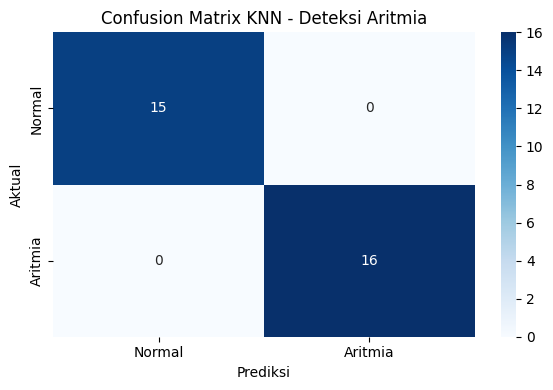

In [17]:
# 7. Evaluasi model
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print("=== Confusion Matrix ===")
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Aritmia'], yticklabels=['Normal', 'Aritmia'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix KNN - Deteksi Aritmia')
plt.tight_layout()
plt.show()

In [18]:
# 8 Menampilkan laporan klasifikasi
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

# 9 Menampilkan akurasi
print("\n=== Akurasi ===")
print(f"{accuracy_score(y_test, y_pred) * 100:.2f}%")

# 10. Prediksi untuk seluruh data
full_predictions = knn.predict(X_scaled)
df['output'] = full_predictions
df['result'] = df['output'].apply(lambda x: 'Sangat Berpotensi Aritmia' if x == 1 else 'Normal')

# 11. Simpan ke Excel hasil akhir
output_file = 'hasil_knn.xlsx'
df.to_excel(output_file, index=False)
print(f"\n✅ Hasil lengkap disimpan ke file: {output_file}")


=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        16

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31


=== Akurasi ===
100.00%

✅ Hasil lengkap disimpan ke file: hasil_knn.xlsx
